In [2]:
!pip install wordcloud



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


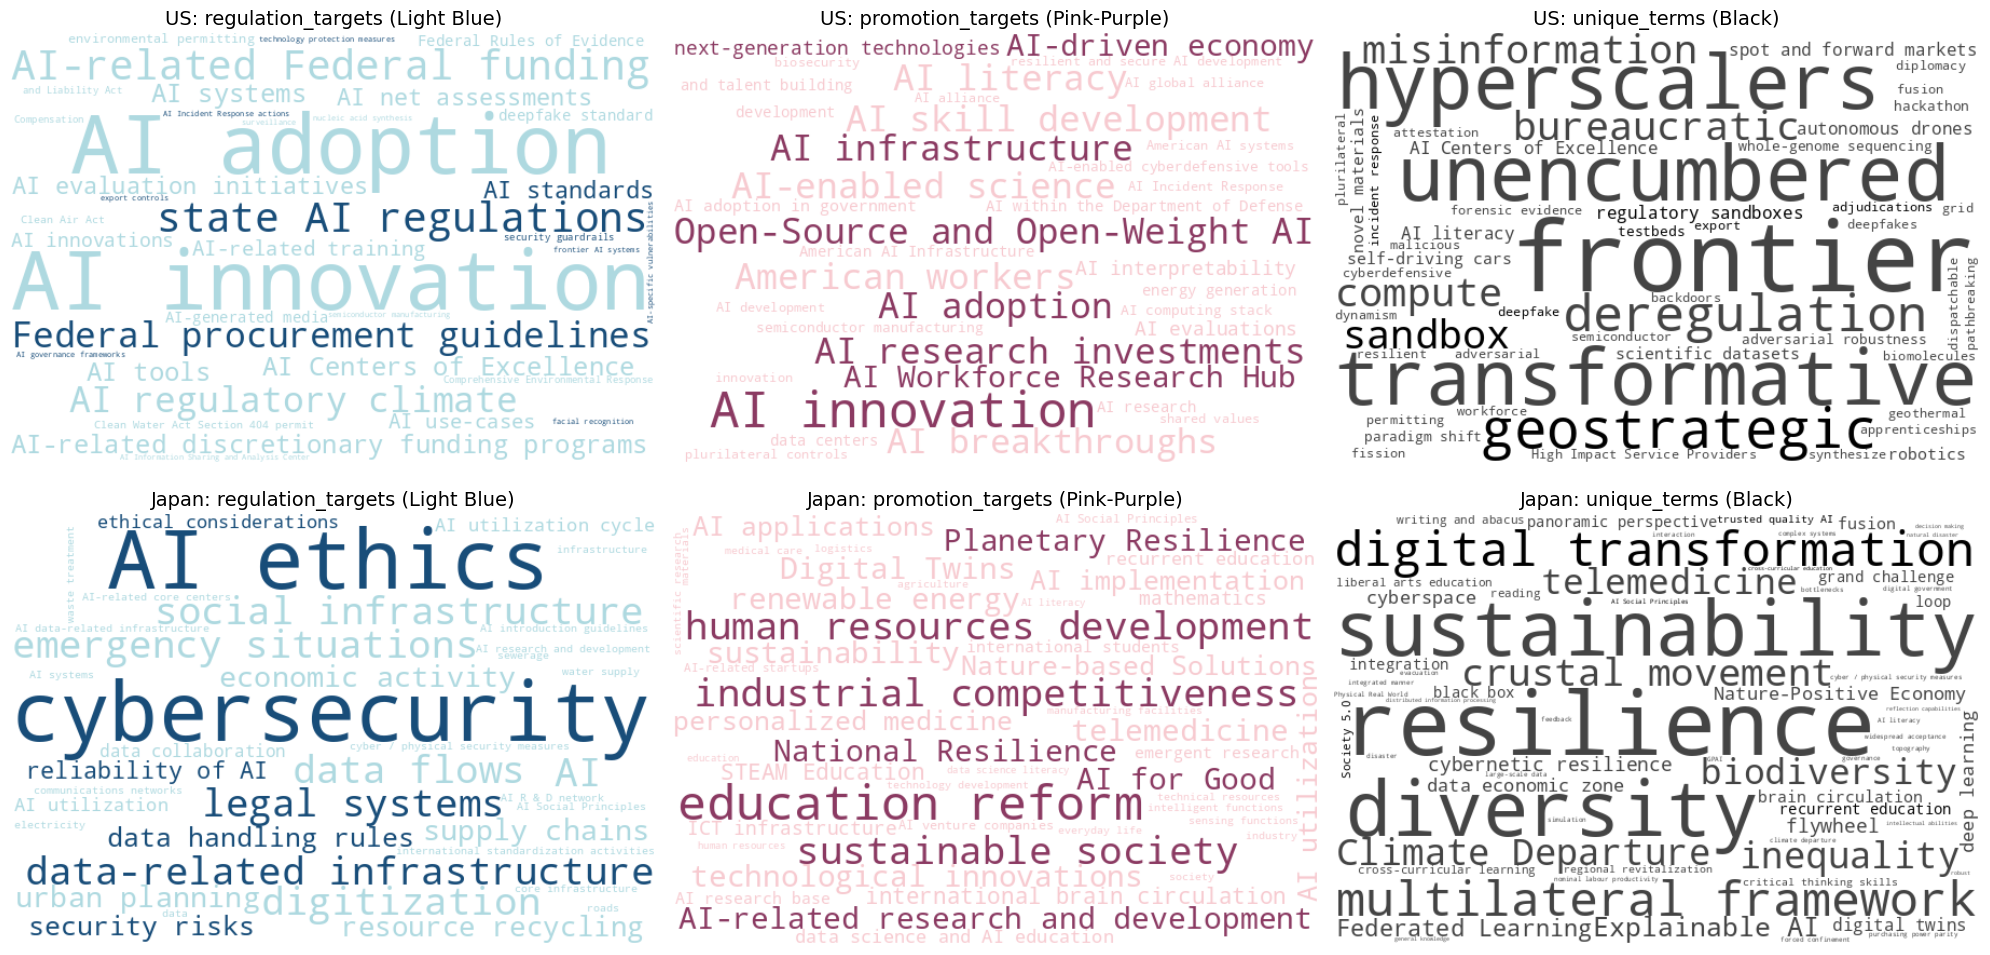

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('ai_policy_keywords_clean.csv')

# 強調したい規制/推進/ユニークワード
us_reg_emph = {"AI standards", "AI governance frameworks", "Federal procurement guidelines", "export controls", "security guardrails", "frontier AI systems", "facial recognition", "AI Incident Response actions", "state AI regulations", "AI-specific vulnerabilities", "technology protection measures"}
jp_reg_emph = {"cybersecurity", "AI ethics", "data-related infrastructure", "legal systems", "data handling rules", "ethical considerations", "reliability of AI", "security risks"}
us_unique_emph = {"regulatory sandboxes", "sandbox", "deepfake", "incident response", "adjudications", "testbeds", "technology protection measures", "export", "geostrategic"}
jp_unique_emph = {"STEAM Education", "Society 5.0", "recurrent education", "digital transformation", "trusted quality AI", "AI Social Principles", "cross-curricular education"}
us_prom_emph = {"AI innovation", "AI adoption", "AI infrastructure", "AI research investments", "AI-driven economy", "Open-Source and Open-Weight AI", "next-generation technologies", "AI Workforce Research Hub"}
jp_prom_emph = {"education reform", "human resources development", "industrial competitiveness", "sustainable society", "AI-related research and development", "AI for Good", "Planetary Resilience", "National Resilience"}

def color_func_factory(emph_set, base_color, emph_color):
    def color_func(word, **kwargs):
        return emph_color if word in emph_set else base_color
    return color_func

country_list = ['US', 'Japan']
category_list = [
    ('regulation_targets', 'Light Blue', '#aed9e0', '#184d79', us_reg_emph, jp_reg_emph),
    ('promotion_targets', 'Pink-Purple', '#f7cad0', '#8b3a62', us_prom_emph, jp_prom_emph),
    ('unique_terms', 'Black', '#444444', '#000000', us_unique_emph, jp_unique_emph)
]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, country in enumerate(country_list):
    row = df[df['country'] == country].iloc[0]
    for j, (col, label, base, emph, us_emph, jp_emph) in enumerate(category_list):
        raw_words = [w.strip() for w in row[col].split(',') if w.strip()]
        freq = {w: 1 for w in raw_words}
        emph_set = us_emph if country == 'US' else jp_emph
        color_func = color_func_factory(emph_set, base, emph)
        wc = WordCloud(width=600, height=400, background_color='white', collocations=False).generate_from_frequencies(freq)
        axes[i, j].imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
        axes[i, j].axis('off')
        axes[i, j].set_title(f'{country}: {col} ({label})', fontsize=14)
plt.tight_layout()
plt.show()


In [9]:
for country in country_list:
    row = df[df['country'] == country].iloc[0]
    for col, label, base, emph, us_emph, jp_emph in category_list:
        raw_words = [w.strip() for w in row[col].split(',') if w.strip()]
        freq = {w: 1 for w in raw_words}
        emph_set = us_emph if country == 'US' else jp_emph
        color_func = color_func_factory(emph_set, base, emph)
        wc = WordCloud(width=600, height=400, background_color='white', collocations=False).generate_from_frequencies(freq)
        wc_img = wc.recolor(color_func=color_func)
        plt.figure(figsize=(8, 6))
        plt.imshow(wc_img, interpolation='bilinear')
        plt.axis('off')
        filename = f"{country}_{col}.png"
        plt.title(f"{country}: {col} ({label})", fontsize=14)
        plt.tight_layout()
        plt.savefig(filename)
        plt.close()
        print(f"Saved: {filename}")



Saved: US_regulation_targets.png
Saved: US_promotion_targets.png
Saved: US_unique_terms.png
Saved: Japan_regulation_targets.png
Saved: Japan_promotion_targets.png
Saved: Japan_unique_terms.png
